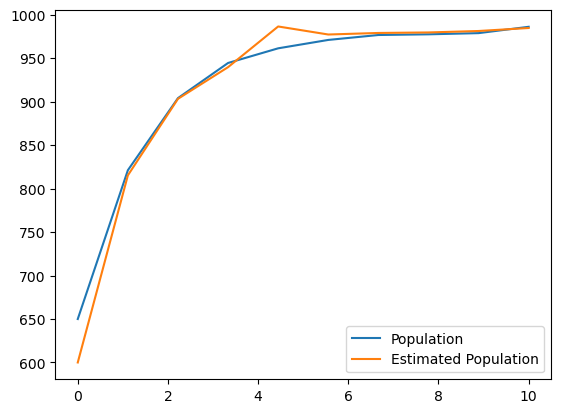

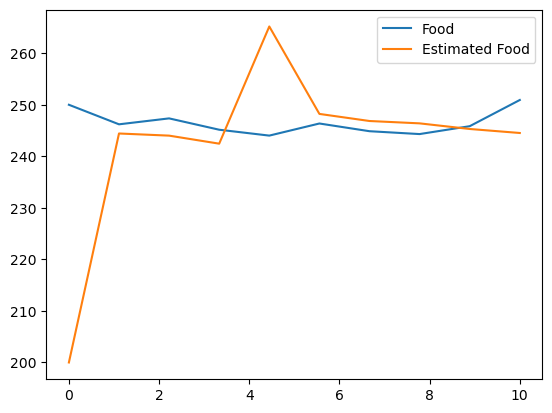

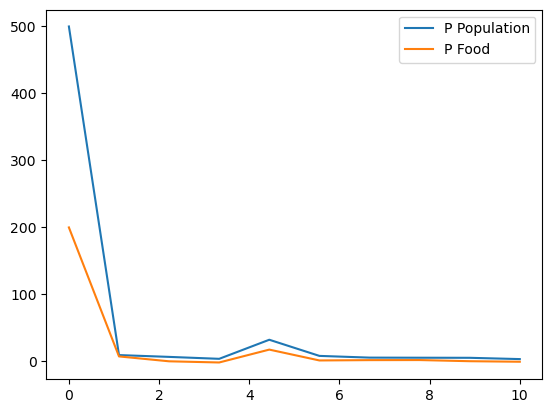

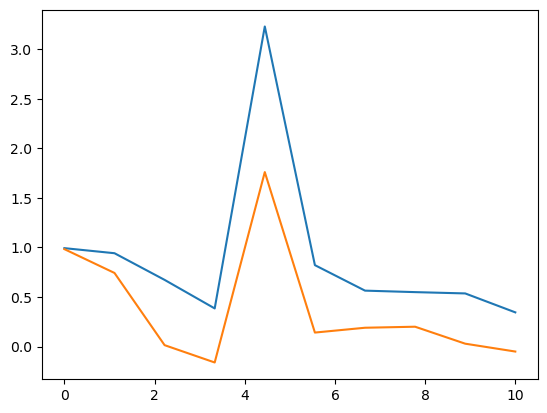

17.850376302665506

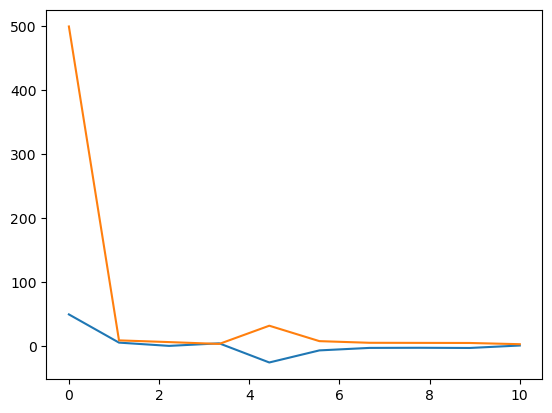

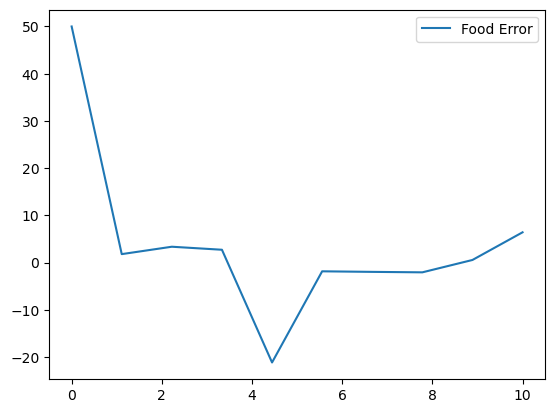

In [21]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[1]])
B = np.array([[3]])
A @ B

time_steps = 10

F = np.array([[0.5, 2],
             [0, 1]])

x = np.zeros((2, 1, time_steps))
x[:, :, 0] = np.array([[650], 
                      [250]])

x_minus = np.zeros((2, 1, time_steps))
x_minus[:, :, 0] = np.array([[600],
                            [200]])

x_plus = np.zeros((2, 1, time_steps))
x_plus[:, :, 0] = np.array([[600],
                           [200]])

P_minus = np.zeros((2, 2, time_steps))
P_minus[:, :, 0] = np.array([[500, 0],
                            [0, 200]])

P_plus = np.zeros((2, 2, time_steps))
P_plus[:, :, 0] = np.array([[500, 0],
                           [0, 200]])

y = np.zeros((2, 1, time_steps))
y[:, :, 0] = np.array([[600],
                      [200]])
H = np.array([[1, 0],
              [0, 1]])

K = np.zeros((2, 2, time_steps))
v = np.random.normal(0, np.sqrt(10))
K[:, :, 0] = P_minus[:, :, 0]@np.transpose(H)@np.linalg.inv(H@P_minus[:, :, 0]@np.transpose(H)+np.array([[v], [v]]))

Q, R = 10, 10
def kalman_filter(x, y, x_minus, x_plus, P_minus, P_plus, F, H, Q, R, K, time_steps):
    for i in range(1, time_steps):
        v = np.random.normal(0, np.sqrt(Q))
        x[:, :, i] = F @ x[:, :, i-1] + np.array([[v], [v]])
        y[:, :, i] = H @ x[:, :, i] + np.array([[v], [v]])
        w = np.random.normal(0, np.sqrt(R))
        x_minus[:, :, i] = F @ x_plus[:, :, i-1] + np.array([[w], [w]])
        P_minus[:, :, i] = F @ P_plus[:, :, i-1] @ np.transpose(F) + np.array([[w], [w]])
        K[:, :, i] = P_minus[:,:, i]@np.transpose(H)@np.linalg.inv(H@P_minus[:,:, i]@np.transpose(H)+np.array([[10, 0], [0, 10]]))
        x_plus[:, :, i] = x_minus[:, :, i] + K[:, :, i]@(y[:, :, i]-H@x_minus[:, :, i])
        P_plus[:, :, i] = (np.eye(2)-K[:, :, i]@H)@P_minus[:, :, i]
    return x, y, x_minus, x_plus, P_minus, P_plus, K

x, y, x_minus, x_plus, P_minus, P_plus, K = kalman_filter(x, y, x_minus, x_plus, P_minus, P_plus, F, H, Q, R, K, time_steps)

plt.plot(np.linspace(0, 10, time_steps), x[0, 0, :], label='Population')
plt.plot(np.linspace(0, 10, time_steps), x_plus[0, 0, :], label='Estimated Population')
plt.legend()
plt.show()

plt.plot(np.linspace(0, 10, time_steps), x[1, 0, :], label='Food')
plt.plot(np.linspace(0, 10, time_steps), x_plus[1, 0, :], label='Estimated Food')
plt.legend()
plt.show()

plt.plot(np.linspace(0, 10, time_steps), P_plus[0, 0, :], label='P Population')
plt.plot(np.linspace(0, 10, time_steps), P_plus[1, 1, :], label='P Food')
plt.legend()
plt.show()

plt.plot(np.linspace(0, 10, time_steps), K[0, 0, :], label='K Population')
plt.plot(np.linspace(0, 10, time_steps), K[1, 1, :], label='K Food')
plt.show()

# find standard deviation of the error and plot it
error_pop = x[0, 0, :]-x_plus[0, 0, :]
np.std(error_pop)
error_food = x[1, 0, :]-x_plus[1, 0, :]
np.std(error_food)
display(np.std(error_pop))
plt.plot(np.linspace(0, 10, time_steps), error_pop, label='Population Error')
plt.plot(np.linspace(0, 10, time_steps), P_plus[0, 0, :], label='P Population')
plt.show()
plt.plot(np.linspace(0, 10, time_steps), error_food, label='Food Error')
plt.legend()
plt.show()
